<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorios N°06

<a id='p1'></a>
## I.- Problema 01


<img src="https://drive.google.com/uc?export=view&id=1iLbdUKIrQByZ_yJFKOonV2VK4UL1aMvA" width = "400" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [48]:
# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [49]:
data['dataset'].value_counts()

I      11
II     11
III    11
IV     11
Name: dataset, dtype: int64

Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.

In [50]:
data1 = data[data['dataset']=='I'].drop('dataset',axis=1)
display(data1.head())

,x,y
0,10.0,8.04
1,8.0,6.95
2,13.0,7.58
3,9.0,8.81
4,11.0,8.33


In [51]:
data2 = data[data['dataset']=='II'].drop('dataset',axis=1)
display(data2.head())

,x,y
11,10.0,9.14
12,8.0,8.14
13,13.0,8.74
14,9.0,8.77
15,11.0,9.26


In [52]:
data3 = data[data['dataset']=='III'].drop('dataset',axis=1)
display(data3.head())

,x,y
22,10.0,7.46
23,8.0,6.77
24,13.0,12.74
25,9.0,7.11
26,11.0,7.81


In [53]:
data4 = data[data['dataset']=='IV'].drop('dataset',axis=1)
display(data4.head())

,x,y
33,8.0,6.58
34,8.0,5.76
35,8.0,7.71
36,8.0,8.84
37,8.0,8.47


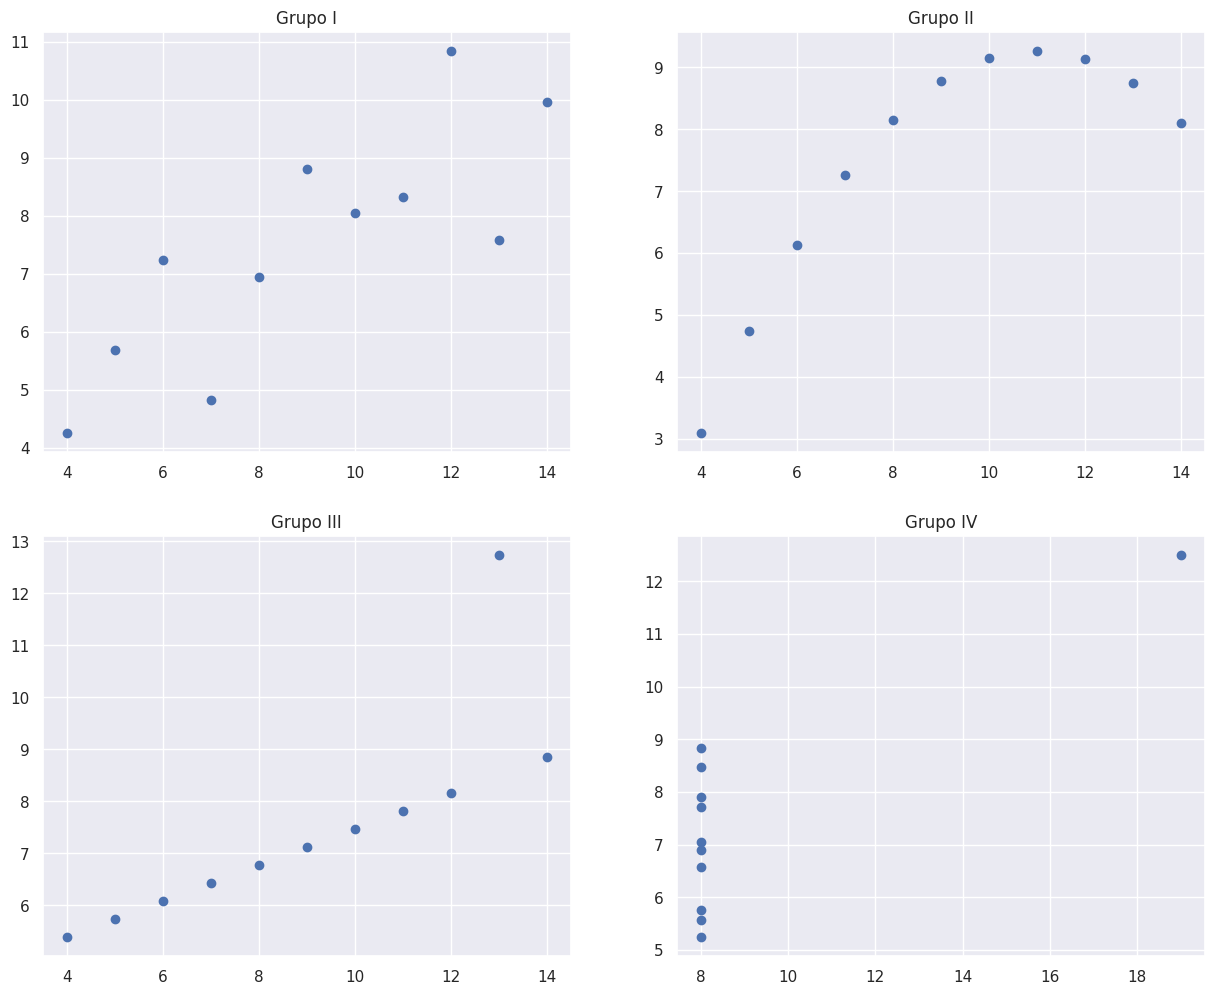

In [54]:
# Aqui colocar grafico
fig = plt.figure(figsize=(15,12))

#Primer grafico
plt.subplot(2,2,1)
x1 = data1['x']
y1 = data1['y']
plt.scatter(x1,y1)
plt.title('Grupo I')

#Segundo grafico
plt.subplot(2,2,2)
x2 = data2['x']
y2 = data2['y']
plt.scatter(x2,y2)
plt.title('Grupo II')

#Tercer grafico
plt.subplot(2,2,3)
x3 = data3['x']
y3 = data3['y']
plt.scatter(x3,y3)
plt.title('Grupo III')

#Cuarto grafico
plt.subplot(2,2,4)
x4 = data4['x']
y4 = data4['y']
plt.scatter(x4,y4)
plt.title('Grupo IV')

plt.show()

R: En los gráficos se puede observar que los grupos son muy distintos entre si, por ejemplo en el grupo III se puede observar una relacion lineal entre las variables, mientras que en el grupo II se observa un comportamiento no lineal de los datos.

2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando `describe` para cada grupo. Interprete.

In [55]:
# De grupo I
data1.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


In [56]:
# De grupo II
data2.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


In [57]:
# De grupo III
data3.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500000
std,3.316625,2.030424
min,4.000000,5.390000
25%,6.500000,6.250000
50%,9.000000,7.110000
75%,11.500000,7.980000
max,14.000000,12.740000


In [58]:
# De grupo IV
data4.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.030579
min,8.000000,5.250000
25%,8.000000,6.170000
50%,8.000000,7.040000
75%,8.000000,8.190000
max,19.000000,12.500000


R: Podemos observar que las medidas estadísticas son las mismas para todos los dataset, lo que confirma lo planteado en el enunciado acerca del Cuarteto de Anscombe, puesto que, a pesar de tener las mismas medidas estadísticas, los conjuntos son notablemente distintos si consideramos los gráficos de la parte 1.

3. Realice un ajuste lineal (con **sklearn**) y calcule los resultados de las métricas para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.

In [59]:
# Se definen funciones para obtener las metricas para cada grupo (el codigo se extrajo de https://github.com/fralfaro/MAT281_2023/blob/main/docs/lectures/machine_learning/reg_01.ipynb )

from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def regression_metrics(df):
    """
    Aplicar las distintas métricas definidas
    :param df: DataFrame con las columnas: ['y', 'yhat']
    :return: DataFrame con las métricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mean_absolute_error(y_true, y_pred), 4)]
    df_result['mse'] = [round(mean_squared_error(y_true, y_pred), 4)]
    df_result['rmse'] = [round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)]
    df_result['mape'] = [round(mean_absolute_percentage_error(y_true, y_pred), 4)]
    df_result['smape'] = [round(2 * mean_absolute_percentage_error(y_true, y_pred) / (mean_absolute_percentage_error(y_true, y_pred) + 100), 4)]

    return df_result

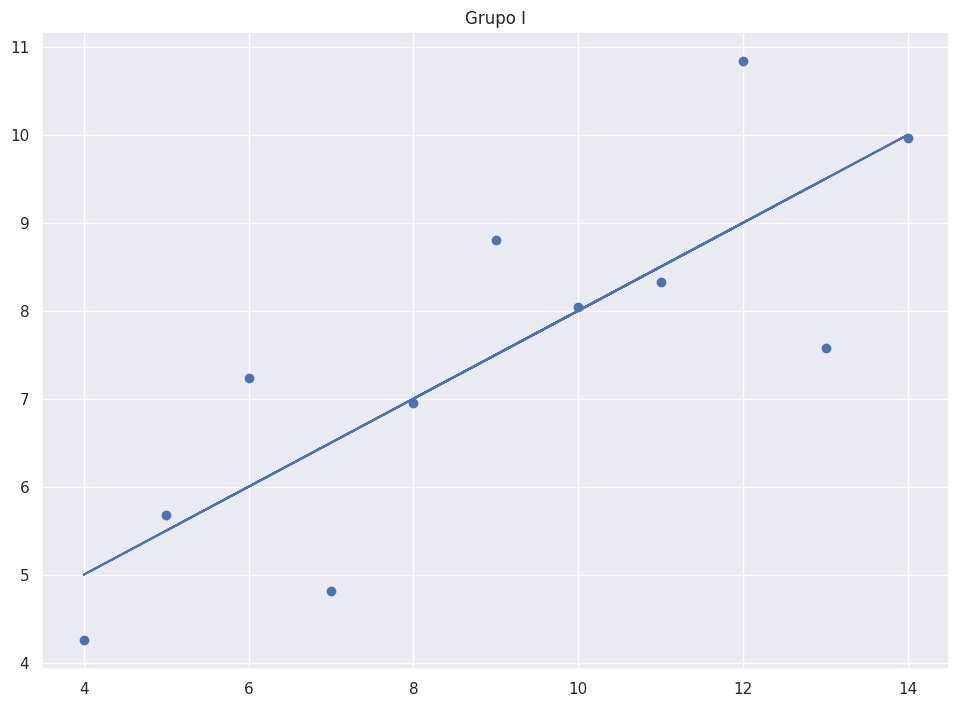


Las métricas asociadas al grupo I son: 


,mae,mse,rmse,mape,smape
0,0.8374,1.2512,1.1185,12.1258,0.2163


In [60]:
# Para grupo I

X1 = data1.drop('y',axis=1)
Y1 = data1['y']

#Definimos modelo
modelo1 = LinearRegression()

#Entrenamos modelo
modelo1.fit(X1,Y1)

pred1 = modelo1.predict(X1)

#Se grafica
plt.scatter(X1,Y1)
plt.plot(X1, pred1)
plt.title('Grupo I')

plt.show()

#Se aplicaran las metricas al modelo 1
ev1 = pd.DataFrame()
ev1['y'] = data1['y']
ev1['yhat'] = pred1

print("\nLas métricas asociadas al grupo I son: ")
regression_metrics(ev1)

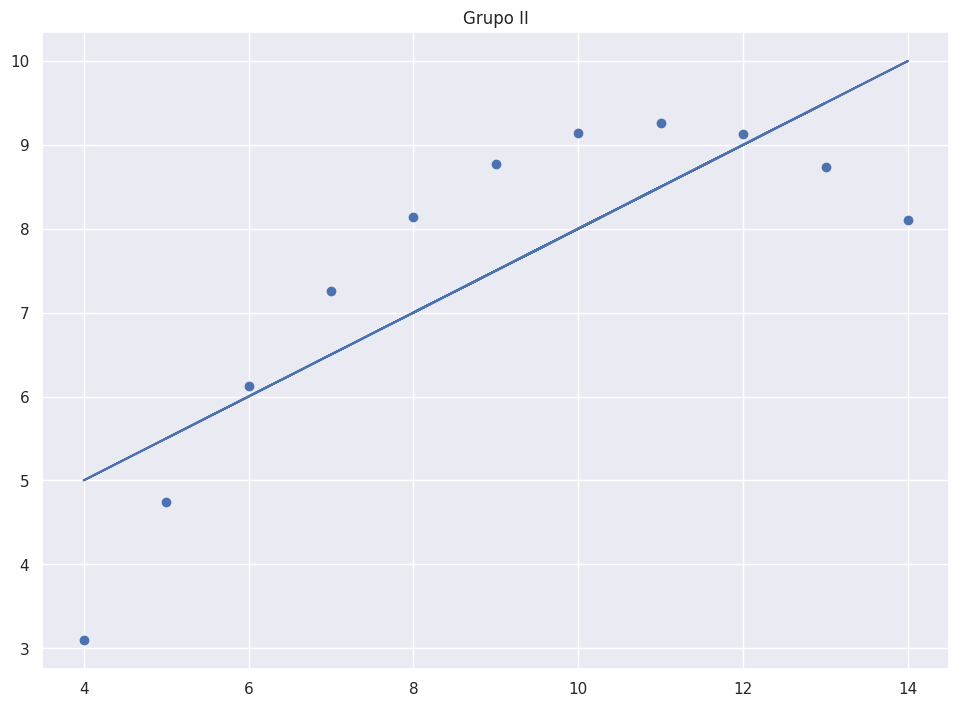


Las métricas asociadas al grupo II son: 


,mae,mse,rmse,mape,smape
0,0.9679,1.2524,1.1191,15.6952,0.2713


In [61]:
# Para grupo II

X2 = data2.drop('y',axis=1)
Y2 = data2['y']

#Definimos modelo
modelo2 = LinearRegression()

#Entrenamos modelo
modelo2.fit(X2,Y2)

pred2 = modelo2.predict(X2)

#Se grafica
plt.scatter(X2,Y2)
plt.plot(X2, pred2)
plt.title('Grupo II')

plt.show()

#Se aplicaran las metricas al modelo 2
ev2 = pd.DataFrame()
ev2['y'] = data2['y']
ev2['yhat'] = pred2

print("\nLas métricas asociadas al grupo II son: ")
regression_metrics(ev2)

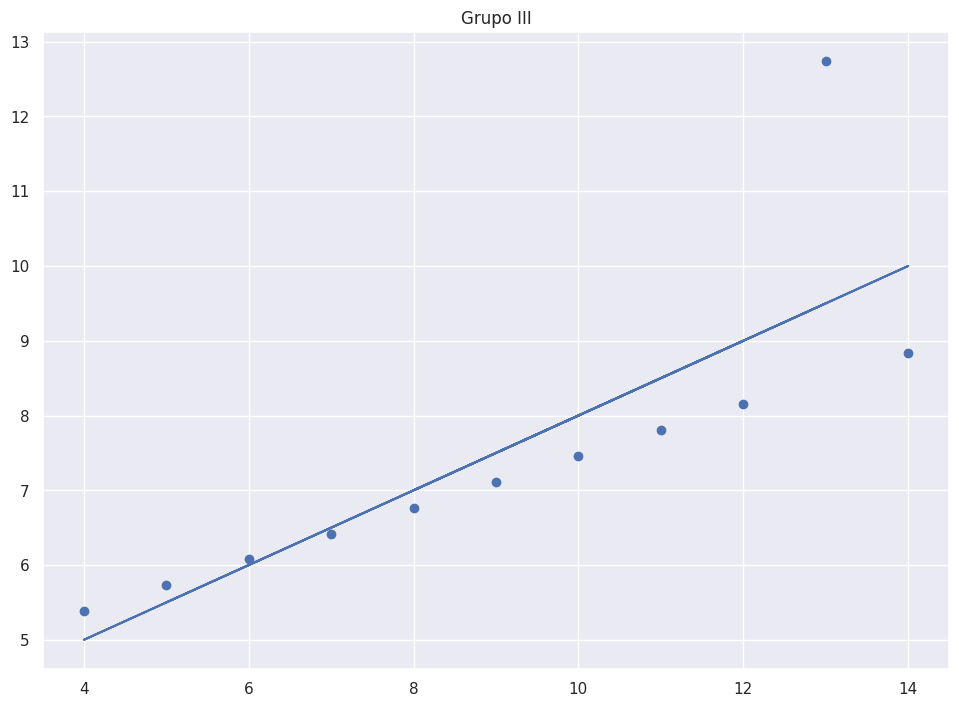


Las métricas asociadas al grupo III son: 


,mae,mse,rmse,mape,smape
0,0.716,1.2506,1.1183,7.9707,0.1476


In [62]:
# Para grupo III

X3 = data3.drop('y',axis=1)
Y3 = data3['y']

#Definimos modelo
modelo3 = LinearRegression()

#Entrenamos modelo
modelo3.fit(X3,Y3)

pred3 = modelo3.predict(X3)

#Se grafica
plt.scatter(X3,Y3)
plt.plot(X3, pred3)
plt.title('Grupo III')

plt.show()

#Se aplicaran las metricas al modelo 3
ev3 = pd.DataFrame()
ev3['y'] = data3['y']
ev3['yhat'] = pred3

print("\nLas métricas asociadas al grupo III son: ")
regression_metrics(ev3)

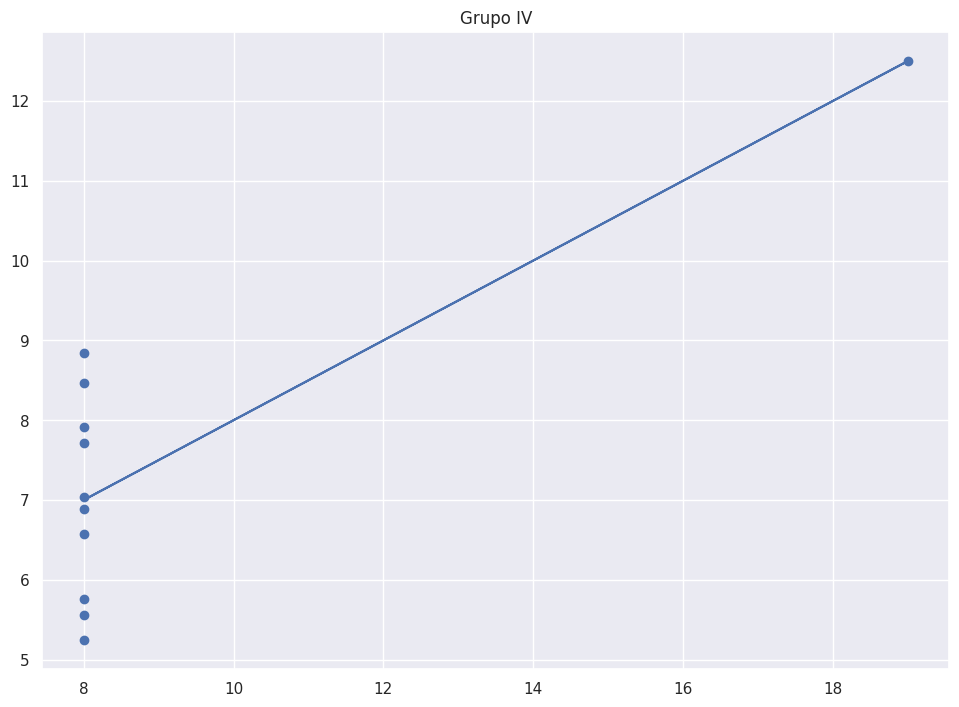


Las métricas asociadas al grupo IV son: 


,mae,mse,rmse,mape,smape
0,0.9027,1.2493,1.1177,13.4738,0.2375


In [63]:
# Para grupo IV

X4 = data4.drop('y',axis=1)
Y4 = data4['y']

#Definimos modelo
modelo4 = LinearRegression()

#Entrenamos modelo
modelo4.fit(X4,Y4)

pred4 = modelo4.predict(X4)

#Se grafica
plt.scatter(X4,Y4)
plt.plot(X4, pred4)
plt.title('Grupo IV')

plt.show()

#Se aplicaran las metricas al modelo 4
ev4 = pd.DataFrame()
ev4['y'] = data4['y']
ev4['yhat'] = pred4

print("\nLas métricas asociadas al grupo IV son: ")
regression_metrics(ev4)

R: En los grupos I y III resulta correcto hacer el ajuste lineal, pero en el grupo III no se observa un comportamiento lineal, por lo que el ajuste lineal no es correcto y en el grupo IV tenemos demasiados datos asociados a un mismo valor de x.

4. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

R: Para el grupo I es correcto utilizar una regresión lineal pues los datos no se alejan demasiado del ajuste lineal.

Para el grupo II resulta necesario usar un ajuste distinto al lineal, pues el comportamiento de los datos es no lineal, en tal caso puede ser util un ajuste polinomico.

Para el grupo III es posible quitar un punto que esta completamente por fuera del comportamiento de los demas datos y entonces el ajuste puede mejorarse al resto de los datos que tienen un comportamiento lineal

Para el grupo IV no es posible arreglar el problema del todo pues no hay una correspondencia entre los datos a la que se pueda ajustar una función, incluso podrian estar mal clasificados los datos (por ejemplo, los valores que se supone son independientes, podrian ser los dependientes), puesto que existen diversos valores asociados al valor 8 en el eje X.

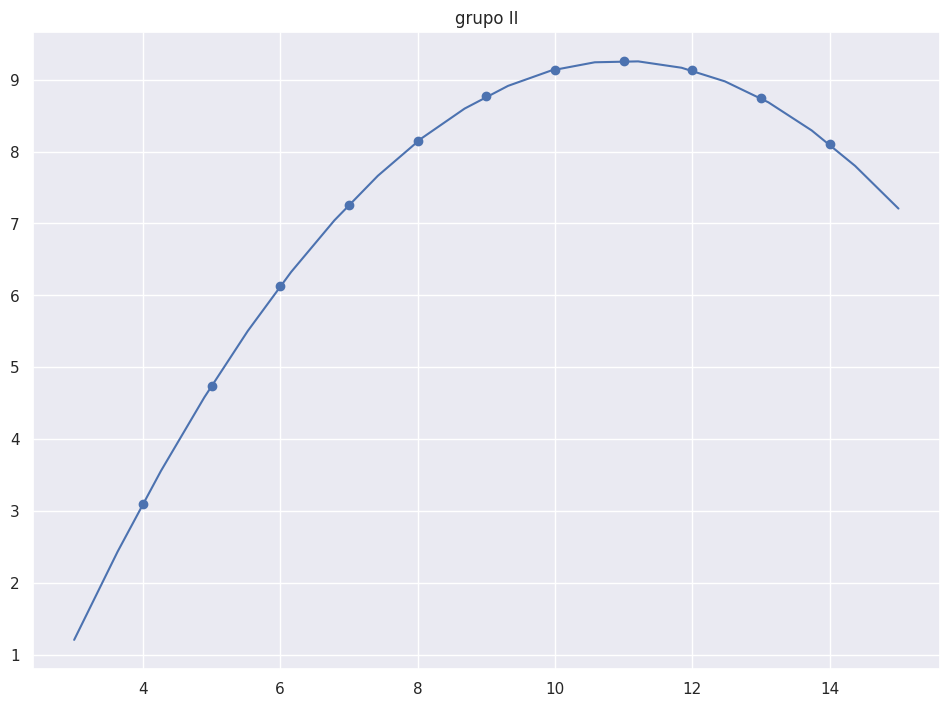

In [64]:
# Para el grupo II

X2 = data2['x']
Y2 = data2['y']

line = np.linspace(3,15,20)
modelo2_2 = np.poly1d(np.polyfit(X2, Y2, 2))

plt.scatter(X2,Y2)
plt.plot(line, modelo2_2(line))
plt.title('grupo II')
plt.show()

Para el grupo II fue más efectivo ajustarlo con un polinomio de grado 2.

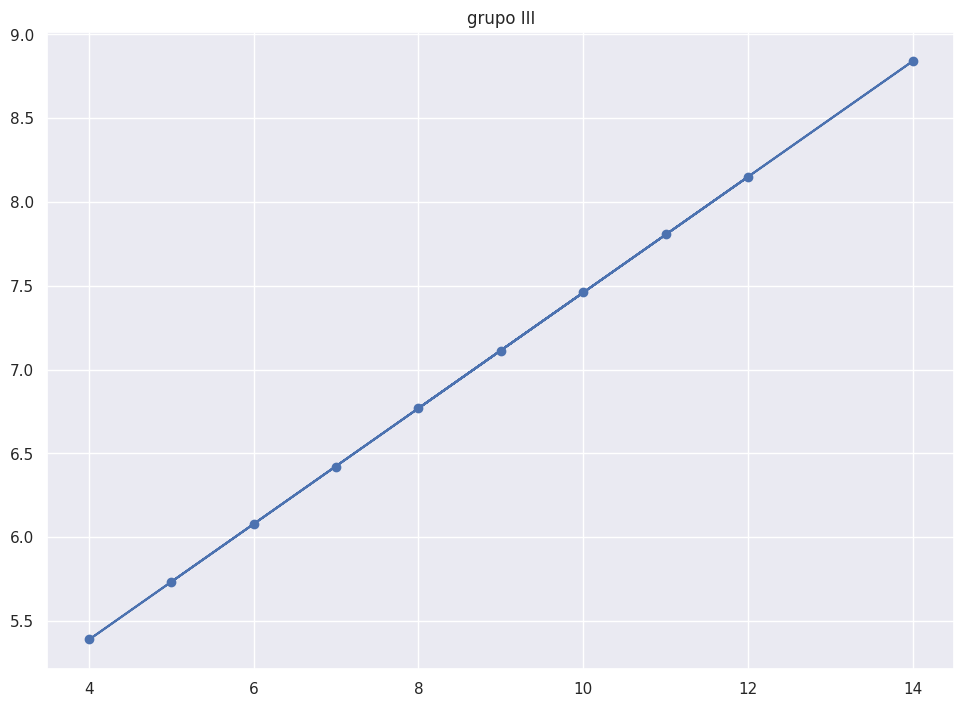

In [65]:
#Para el dataset III

data3new = data3.drop(24)
X3 = data3new.drop('y',axis=1)
Y3 = data3new['y']

#Definimos modelo
modelo3 = LinearRegression()

#Entrenamos modelo
modelo3.fit(X3,Y3)

pred3 = modelo3.predict(X3)

#Se grafica
plt.scatter(X3,Y3)
plt.plot(X3, pred3)
plt.title('grupo III')

plt.show()

Quitando el outlier del grupo 3, el ajuste lineal queda totalmente ajustado a los datos restantes.